In [133]:
#!pip install plotly
#!pip install cufflinks
#!pip install jupyter-dash

In [33]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()
import plotly.express as px

import plotly.graph_objects as go
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

Output hidden; open in https://colab.research.google.com to view.

In [5]:
#Importing 2020 election raw data 
election =pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/2020%20November%20General%20Election%20-%20Turnout%20Rates.csv')

In [6]:
election.head()

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


In [7]:
election.shape

(52, 15)

In [8]:
#setting index  to state column
df = election.set_index('State')
#We then call it to see if our changes are implemented
df.head()

,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
State,,,,,,,,,,,,,,
United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


In [9]:
#Removing columns that we feel like is not necessary for us. 
#We create a list of columns we want to drop and store it in a variable. 
columns_to_be_dropped=['Official/Unofficial', 'Overseas Eligible','Source']

#we drop columns by using .drop() function. axis = 1 means columns
df = df.drop(columns_to_be_dropped, axis = 1)

#We then call it to see if our changes are implemented
df.head(3)

,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
State,,,,,,,,,,,
United States,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457",NaN
Alabama,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",AL
Alaska,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",AK


In [10]:
#Regular expression to match only numbers in our data table and take out other
#characters such as commas and percentage for our columns
regex_val = r'^([-+]?[0-9]*\.?[0-9]+)'

In [11]:
#It is difficult to work with object datatype so we are replacing them with int or float datatype
df['% Non-citizen'] = df['% Non-citizen'].str.extract(regex_val, expand=False)
df['% Non-citizen'] = df['% Non-citizen'].astype(float)

In [12]:
#It is difficult to work with object datatype so we are replacing them with int or float datatype
df['VEP Turnout Rate'] = df['VEP Turnout Rate'].str.extract(regex_val, expand=False)
df['VEP Turnout Rate'] = df['VEP Turnout Rate'].astype(float)

In [13]:
#Copying our data into a new variable to make sure we 
#do not make mistakes on our original dataframe 
df_new=df.copy()

In [14]:
#It is difficult to work with object datatype so we are replacing them with int or float datatype
df_new['Total Ballots Counted (Estimate)'] = df_new['Total Ballots Counted (Estimate)'].str.replace(",","").astype(int)
df_new['Vote for Highest Office (President)'] = df_new['Vote for Highest Office (President)'].str.replace(",","").astype(float)
df_new['Voting-Eligible Population (VEP)'] = df_new['Voting-Eligible Population (VEP)'].str.replace(",","").astype(int)
df_new['Voting-Age Population (VAP)'] = df_new['Voting-Age Population (VAP)'].str.replace(",","").astype(int)
df_new['Prison'] = df_new['Prison'].str.replace(",","").astype(int)
df_new['Probation'] = df_new['Probation'].str.replace(",","").astype(int)
df_new['Parole'] = df_new['Parole'].str.replace(",","").astype(int)
df_new['Total Ineligible Felon'] = df_new['Total Ineligible Felon'].str.replace(",","").astype(int)

In [15]:
#Checking to see if our changes for our data type is implemented 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, United States to Wyoming
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Total Ballots Counted (Estimate)     52 non-null     int64  
 1   Vote for Highest Office (President)  24 non-null     float64
 2   VEP Turnout Rate                     52 non-null     float64
 3   Voting-Eligible Population (VEP)     52 non-null     int64  
 4   Voting-Age Population (VAP)          52 non-null     int64  
 5   % Non-citizen                        52 non-null     float64
 6   Prison                               52 non-null     int64  
 7   Probation                            52 non-null     int64  
 8   Parole                               52 non-null     int64  
 9   Total Ineligible Felon               52 non-null     int64  
 10  State Abv                            51 non-null     object 
dtypes: float64(3), int64(7

In [16]:
df_new.tail()

,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
State,,,,,,,,,,,
Virginia,4425000,4409913.0,71.4,6196071,6727440,6.8,35743,63111,1860,76732,VA
Washington,4100000,NaN,75.4,5437844,6070046,9.1,18777,76672,12222,78536,WA
West Virginia,795000,NaN,57.0,1394028,1422098,0.9,6757,6593,4287,15132,WV
Wisconsin,3325000,NaN,76.1,4368530,4586746,3.2,23574,42909,21015,71193,WI
Wyoming,278503,276765.0,64.6,431364,447915,2.2,2488,5383,934,6759,WY


In [17]:
#Changing null values in our data to 0
df_new['Vote for Highest Office (President)'] = df_new['Vote for Highest Office (President)'].fillna(0)

#Renaming Percentage of Non-Citizen columns 
df_new.rename(columns={'% Non-citizen':'NonCitizen', },inplace=True)

#Checking to see if our changes are implemented and all null values are 0.
df_new

,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),NonCitizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
State,,,,,,,,,,,
United States,158835004,0.0,66.4,239247182,257605088,7.8,1461074,1962811,616440,3294457,NaN
Alabama,2306587,2297295.0,62.6,3683055,3837540,2.3,25898,50997,10266,67782,AL
Alaska,367000,0.0,69.8,525568,551117,3.4,4293,2074,1348,6927,AK
Arizona,3400000,0.0,65.5,5189000,5798473,8.9,38520,76844,7536,93699,AZ
Arkansas,1212030,1206697.0,55.5,2182375,2331171,3.6,17510,36719,24698,64974,AR
California,16800000,0.0,64.7,25962648,30783255,15.0,104730,0,102586,207316,CA
Colorado,3295000,0.0,76.4,4313054,4595504,5.7,18905,0,0,18905,CO
Connecticut,1850000,0.0,71.1,2603327,2839560,7.7,13268,0,4452,17720,CT
Delaware,507805,502392.0,70.5,720531,780822,5.8,5874,14176,350,15013,DE


##Which state has the highest and lowest prision rate
###Texas is the highest. Texas also has a high prison rate nationality also. Texas has earned itself a tough on crime reputation because Texas lawmakers on both party sides are starting to see a need for reform



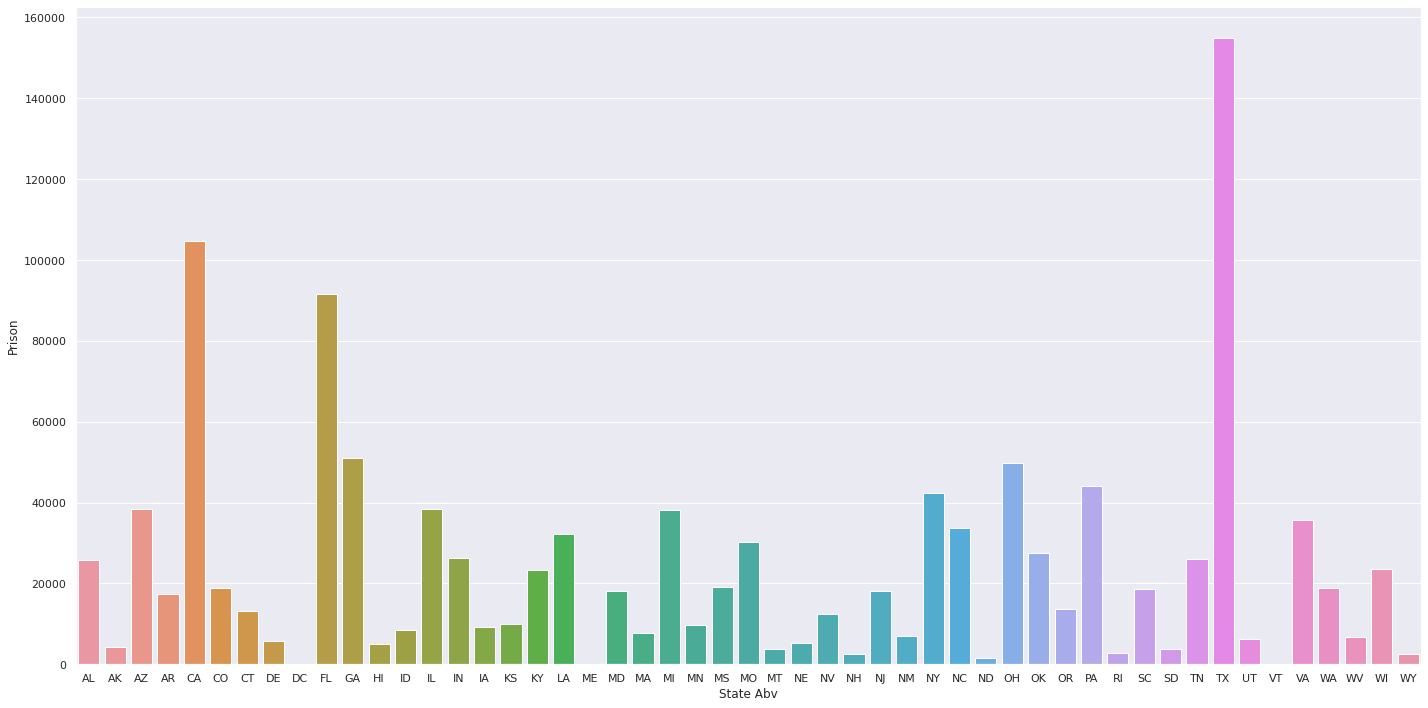

In [35]:
#changing the size of the figure
plt.figure(figsize=(20,10))

#plotting the data in barplot
sns.barplot(x='State Abv', y='Prison', data=df_new)
plt.show()

##Does a higher population of NonCitizens correlate population in prison?

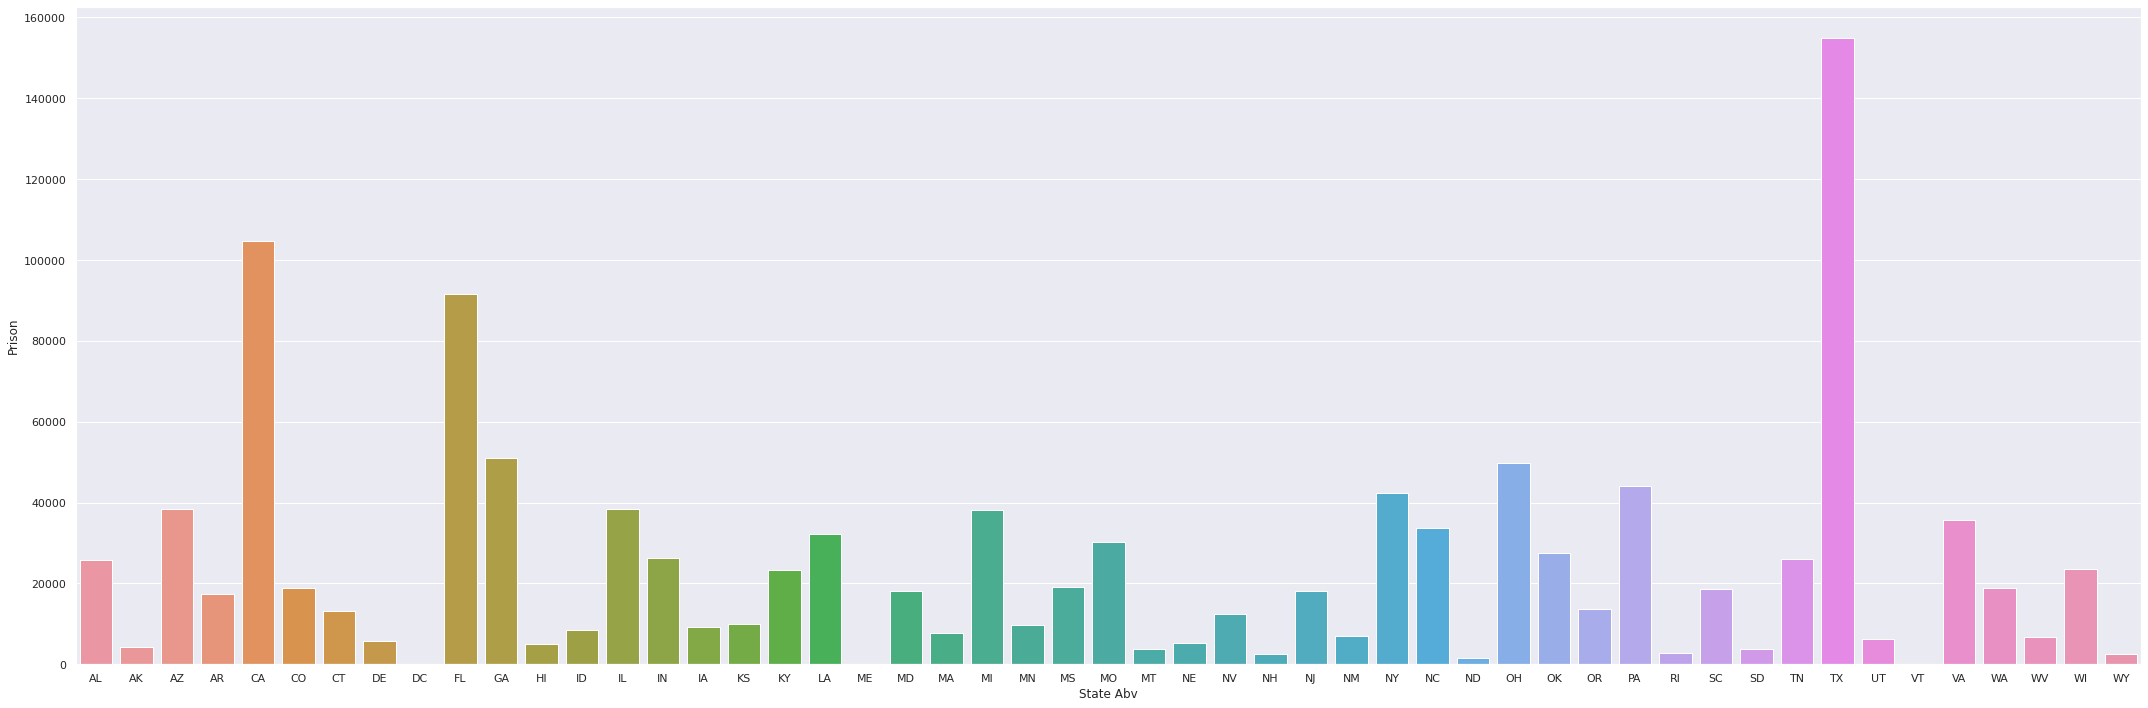

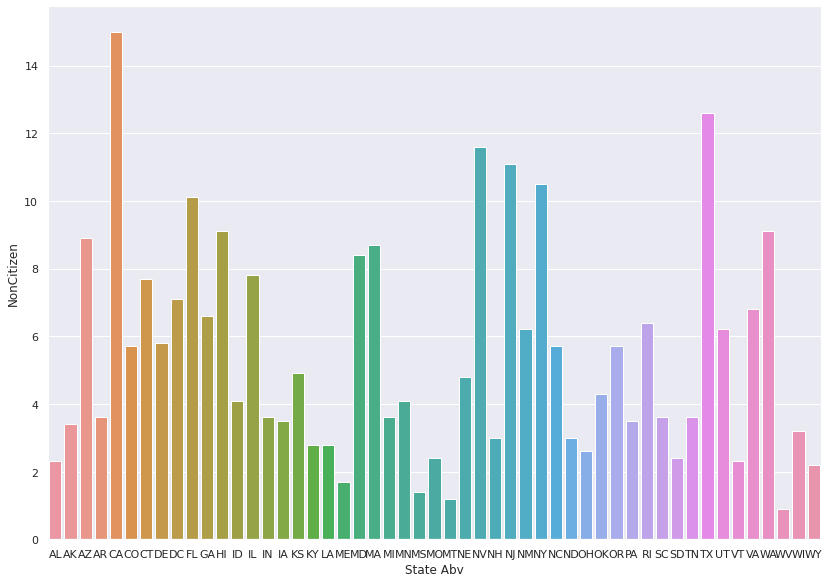

In [53]:
#changing the size of the figure
plt.figure(figsize=(30,10))

#plotting the data in barplot for prison
sns.barplot(x='State Abv', y='Prison', data=df_new)
plt.show()

#plotting the data in barplot for noncitizen
sns.barplot(x='State Abv', y='NonCitizen', data=df_new)
plt.show()

##Compare Voting Eligible Population with Total Ballots Counted

[Text(0, 0.5, ''), (0.0, 19999990.0), Text(0.5, 0, 'Voting')]

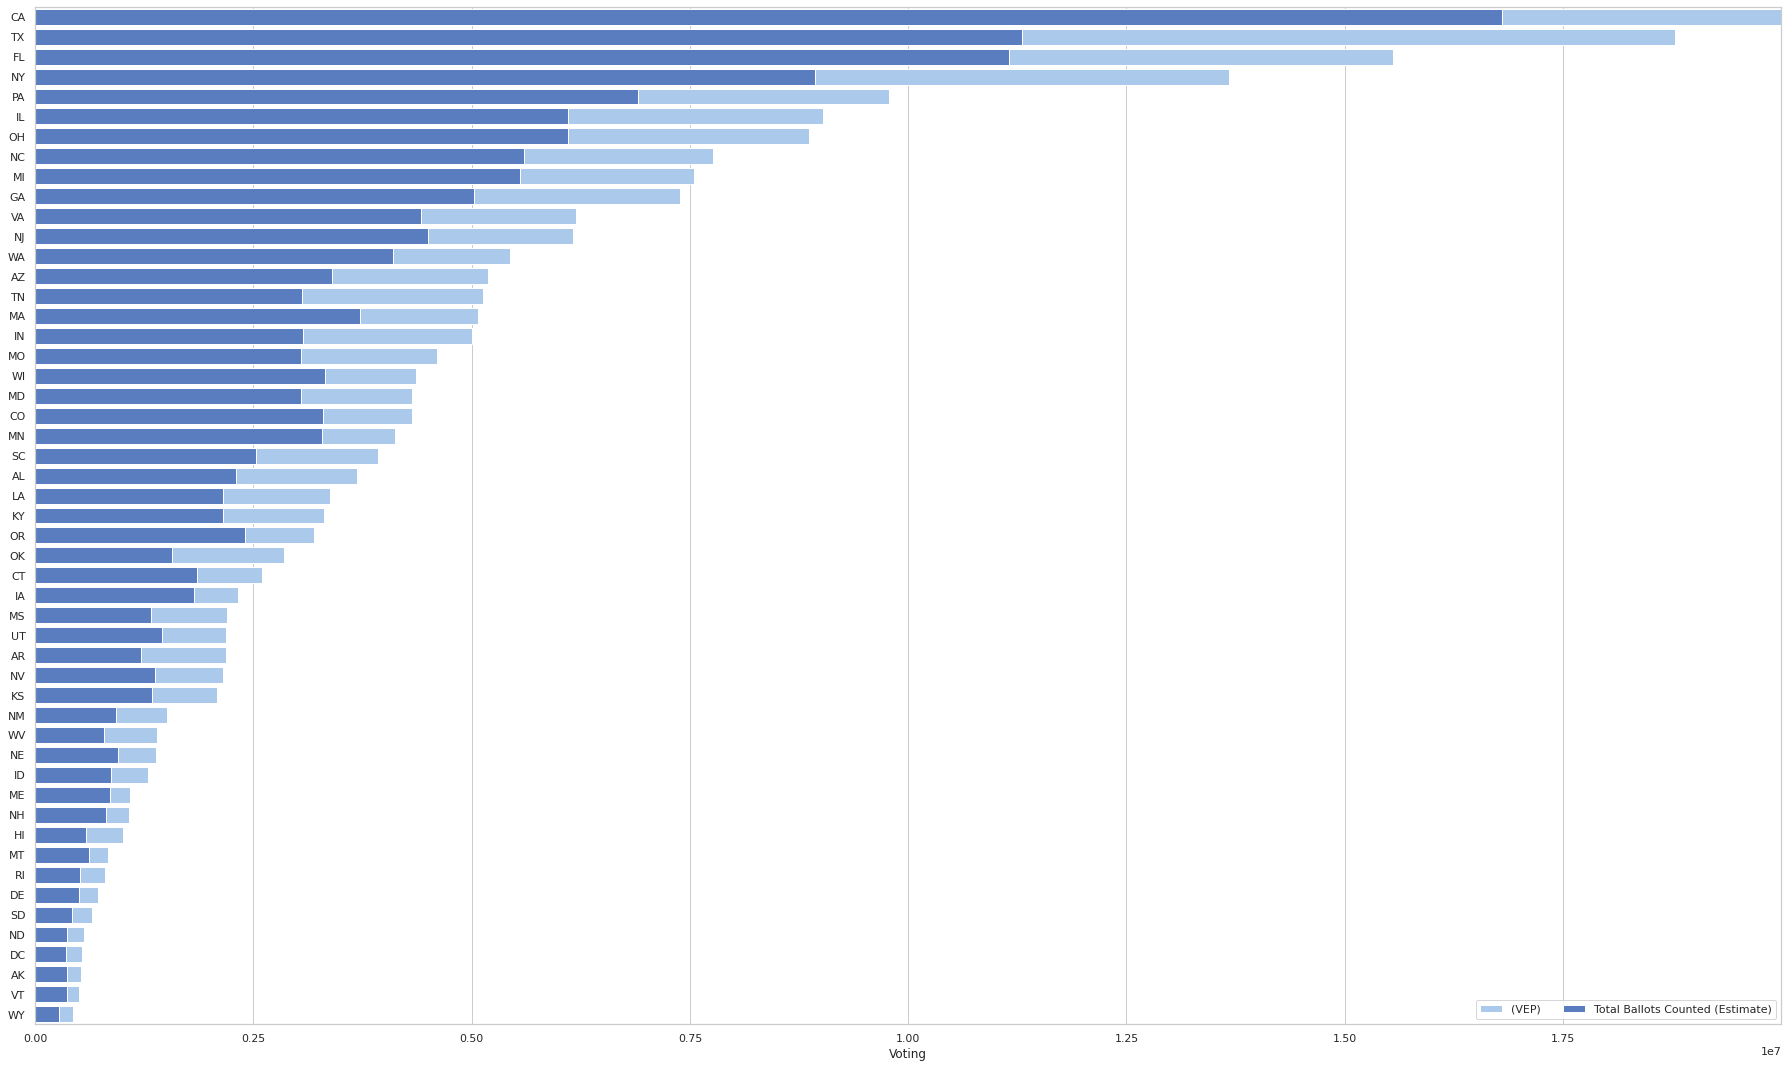

In [54]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# sort data
total = df_new.sort_values("Voting-Eligible Population (VEP)", ascending=False)

# Plot the Voting-Eligible Population (VEP)
sns.set_color_codes("pastel")
sns.barplot(x="Voting-Eligible Population (VEP)", y="State Abv", data=total,
            label="(VEP)", color="b")

# Plot Total Ballots Counted (Estimate)
sns.set_color_codes("muted")
sns.barplot(x="Total Ballots Counted (Estimate)", y="State Abv", data=total,
            label="Total Ballots Counted (Estimate)", color="b")

# Add a legend and informative axis label
ax.legend(ncol=100, loc="lower right", frameon=True)
ax.set(xlim=(0, 19999990), ylabel="",
       xlabel="Voting")
#sns.despine(left=True, bottom=True)

##What is the state with the highest percentage of non-citizens

###California has the largest immigrant eligible voter population by a large margin. In addition, immigrants make up 21% of California’s eligible voters, the highest of any state

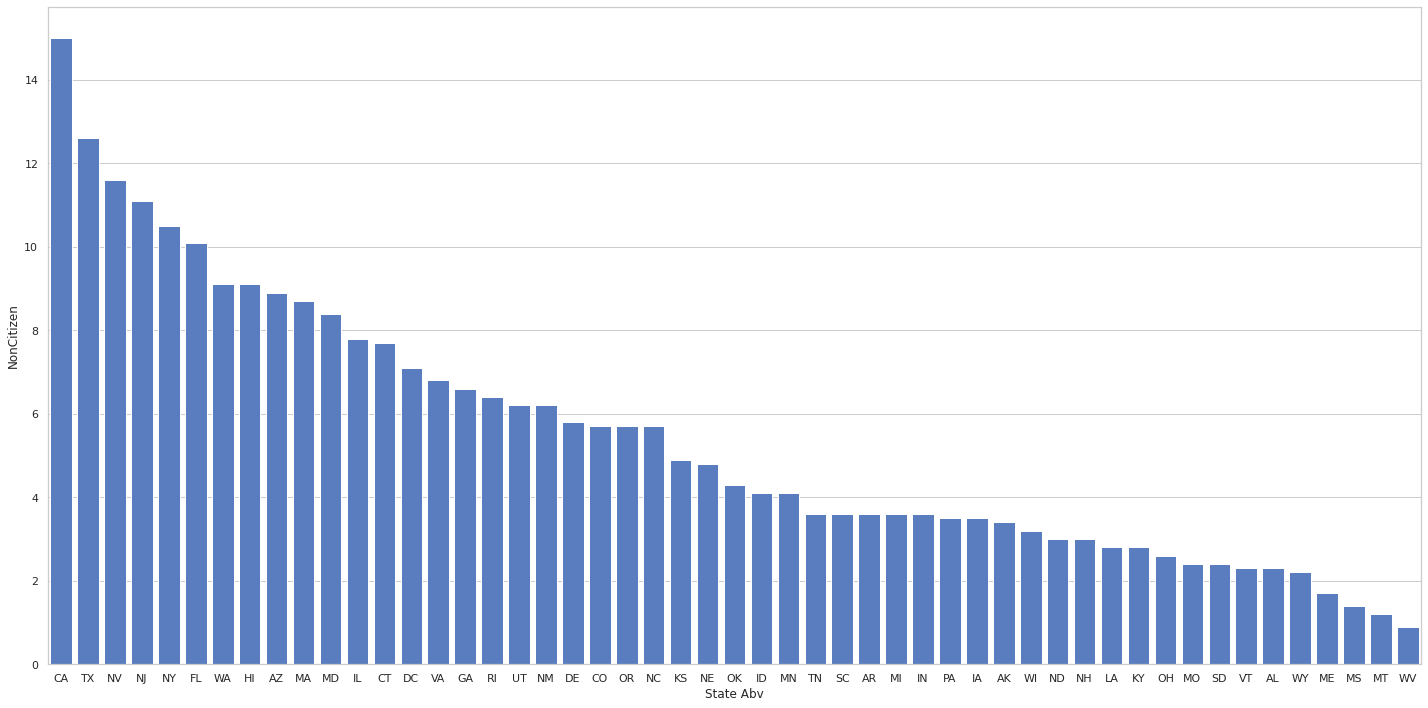

In [55]:
plt.figure(figsize=(20,10))
#sort data
total = df_new.sort_values("NonCitizen", ascending=False)
#choosing the color
sns.set_color_codes("muted")
#plot data
sns.barplot(x='State Abv', y='NonCitizen', data=total, label="NonCitizen", color="b")
plt.show()